<a href="https://colab.research.google.com/github/RNATCC/modelo-1/blob/master/Vers%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

créditos:https://colab.research.google.com/drive/1FvBBw2JNXHy9WeJusI2PPr2PMnGVbbGM#scrollTo=GBotcBrgqR30 (lembrar de referenciar)

In [ ]:
#%matplotlib inline
import pickle
import numpy as np
#import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#carregando o dataset
data_set = '/content/drive/My Drive/WESAD/'
s2_path = data_set + 'S2.pkl'
#modificação necessária pois os dados estavam em py2 e o ambiente usa py3
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [ ]:
#Separando dados de peito de dados de pulso (apenas dados de peito serão considerados conforme análise dos dados)
c_ax=s2_data['signal']['chest']['ACC'][0:,0]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]
c_az=s2_data['signal']['chest']['ACC'][0:,2]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]
c_emg=s2_data['signal']['chest']['EMG'][:,0]
c_eda=s2_data['signal']['chest']['EDA'][:,0]
c_temp=s2_data['signal']['chest']['Temp'][:,0]
c_resp=s2_data['signal']['chest']['Resp'][:,0]
label=s2_data['label']

# Alterar o objeto de dicionário para um array numpy e o array para um dataframe

*(referenciar)*
**Python | Numpy ndarray.T**
https://www.geeksforgeeks.org/python-numpy-ndarray-t/

**Gerando e Manipulando Arrays em Python**
https://towardsdatascience.com/numpy-array-cookbook-generating-and-manipulating-arrays-in-python-2195c3988b09

In [ ]:
peito = [c_ax, c_ay, c_az, c_ecg, c_eda, c_emg, c_resp, c_temp, label]
p_array = np.array(peito)
p_array = p_array.T #(transposição matriz)
Colunas = ['c_ax', 'c_ay', 'c_az', 'c_ecg', 'c_eda', 'c_emg', 'c_resp', 'c_temp', 'label']

p_df = pd.DataFrame(p_array, columns = Colunas)
p_df

,c_ax,c_ay,c_az,c_ecg,c_eda,c_emg,c_resp,c_temp,label
0,0.9554,-0.2220,-0.5580,0.021423,5.250549,-0.004440,-1.148987,30.120758,0.0
1,0.9258,-0.2216,-0.5538,0.020325,5.267334,0.004349,-1.124573,30.129517,0.0
2,0.9082,-0.2196,-0.5392,0.016525,5.243301,0.005173,-1.152039,30.138214,0.0
3,0.8974,-0.2102,-0.5122,0.016708,5.249405,0.007187,-1.158142,30.129517,0.0
4,0.8882,-0.2036,-0.4824,0.011673,5.286407,-0.015152,-1.161194,30.130951,0.0
...,...,...,...,...,...,...,...,...,...
4255295,0.8750,-0.1234,-0.2974,-0.013138,0.400162,0.020370,-1.063538,31.457733,0.0
4255296,0.8750,-0.1262,-0.2988,-0.010345,0.355911,0.019592,-1.106262,31.476898,0.0
4255297,0.8718,-0.1238,-0.3042,-0.005447,0.360489,-0.017166,-1.103210,31.459229,0.0
4255298,0.8730,-0.1234,-0.3026,0.000137,0.365829,-0.028976,-1.086426,31.484283,0.0


In [ ]:
p_df.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,4255300.0,0.753866,0.175116,0.215000,0.621000,0.856800,0.892200,2.029800
c_ay,4255300.0,-0.133188,0.064173,-0.660000,-0.149800,-0.125600,-0.095800,0.539000
c_az,4255300.0,-0.422681,0.300236,-1.135400,-0.717200,-0.322200,-0.209800,1.246800
c_ecg,4255300.0,0.001212,0.154077,-1.499542,-0.067978,0.008240,0.044357,1.499313
c_eda,4255300.0,1.528387,1.238425,0.263214,0.799561,1.163101,1.546478,7.576752
c_emg,4255300.0,-0.002413,0.011652,-0.414963,-0.008331,-0.001602,0.003983,0.300980
c_resp,4255300.0,0.054906,2.917749,-27.903748,-1.481628,-0.157166,1.618958,27.378845
c_temp,4255300.0,30.876676,1.281106,28.045258,30.574951,31.289917,31.815125,34.370392
label,4255300.0,1.212370,1.606596,0.000000,0.000000,0.000000,2.000000,7.000000


Identificando os rótulos, usando apenas:
neutro: 0
stress: 1
diversão: 2

Os demais serão desconsiderados nesse estudo

In [ ]:
neutro = p_df.loc[p_df['label'] == 1]
stress = p_df.loc[p_df['label'] == 2]


p_loc = pd.concat([neutro, stress])
p_loc

,c_ax,c_ay,c_az,c_ecg,c_eda,c_emg,c_resp,c_temp,label
214583,0.8914,-0.1102,-0.2576,0.030945,5.710983,-0.003708,1.191711,29.083618,1.0
214584,0.8926,-0.1086,-0.2544,0.033646,5.719376,-0.014145,1.139832,29.122437,1.0
214585,0.8930,-0.1094,-0.2580,0.033005,5.706406,0.010208,1.141357,29.115234,1.0
214586,0.8934,-0.1082,-0.2538,0.031815,5.712509,0.012634,1.155090,29.126709,1.0
214587,0.8930,-0.1096,-0.2570,0.030350,5.727005,0.002060,1.133728,29.100861,1.0
...,...,...,...,...,...,...,...,...,...
2021977,0.8760,-0.1346,-0.3020,0.001328,3.075409,-0.004715,-1.161194,31.163483,2.0
2021978,0.8770,-0.1352,-0.2998,0.003433,3.059769,-0.003937,-1.124573,31.090057,2.0
2021979,0.8806,-0.1334,-0.2978,0.003616,3.078079,-0.009018,-1.097107,31.098877,2.0
2021980,0.8778,-0.1314,-0.2964,0.003525,3.058624,0.004944,-1.103210,31.101807,2.0


In [ ]:
for col in p_df.columns:
  print(f" col {col} , Qtd de valores únicos: {len(p_loc[col].unique())} , {list(p_loc[col].unique())} \n ")

 col c_ax , Qtd de valores únicos: 2768 , [0.8913999795913696, 0.8926000595092773, 0.8930000066757202, 0.8933999538421631, 0.8905999660491943, 0.8871999979019165, 0.886199951171875, 0.8894000053405762, 0.8874000310897827, 0.8885999917984009, 0.8866000175476074, 0.8858000040054321, 0.8890000581741333, 0.889799952507019, 0.8896000385284424, 0.8877999782562256, 0.8911999464035034, 0.888200044631958, 0.8838000297546387, 0.884600043296814, 0.8855999708175659, 0.8863999843597412, 0.8888000249862671, 0.8910000324249268, 0.8941999673843384, 0.8946000337600708, 0.8938000202178955, 0.8952000141143799, 0.895799994468689, 0.8968000411987305, 0.8974000215530396, 0.8977999687194824, 0.8954000473022461, 0.8969999551773071, 0.8947999477386475, 0.8961999416351318, 0.8924000263214111, 0.8916000127792358, 0.8904000520706177, 0.8921999931335449, 0.8899999856948853, 0.885200023651123, 0.8830000162124634, 0.8849999904632568, 0.8824000358581543, 0.8813999891281128, 0.8818000555038452, 0.8808000087738037, 0.8

# Normalizando dados: train test

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_axis.html (referenciar)

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

import keras
from keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
print(keras.__version__)

2.4.3


In [ ]:
x = p_loc.drop('label',axis=1).values
y = to_categorical(p_loc['label'])

scaler = MinMaxScaler(feature_range= (0,1))
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_test.shape)
evalSet = [(x_train, y_train), (x_test, y_test)]

(985040, 8)
(246260, 3)


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras. layers import Activation
from keras.layers.core import Dense

In [ ]:
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation='tanh'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(1, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_33 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 17        
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical
from keras.optimizers import SGD

In [ ]:
from keras.optimizers import Adam
 # escolha do otimizador
optimizer = tf.keras.optimizers.RMSprop(0.001)

  # Função de custo Erro Quadrado Médio (Mean Squared Error)
model.compile(#Adam(lr=.0001),
             loss='categorical_crossentropy',
                #loss='mse',
                optimizer=optimizer,
                
                metrics=['mae', 'mse', 'accuracy'])

In [ ]:
history= model.fit(x_train, y_train, validation_split=0.1, batch_size=10, epochs=3, shuffle=True, verbose=2)

Epoch 1/3
88654/88654 - 84s - loss: 0.2220 - mae: 0.4440 - mse: 0.2220 - accuracy: 0.6665 - val_loss: 0.2222 - val_mae: 0.4444 - val_mse: 0.2222 - val_accuracy: 0.6667
Epoch 2/3
88654/88654 - 83s - loss: 0.2220 - mae: 0.4440 - mse: 0.2220 - accuracy: 0.6665 - val_loss: 0.2222 - val_mae: 0.4445 - val_mse: 0.2222 - val_accuracy: 0.6667
Epoch 3/3
88654/88654 - 83s - loss: 0.2220 - mae: 0.4440 - mse: 0.2220 - accuracy: 0.6665 - val_loss: 0.2222 - val_mae: 0.4445 - val_mse: 0.2222 - val_accuracy: 0.6667


In [ ]:
acc, loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print(" \n Erro Absoluto Médio de Teste: {:5.2f} \n ".format(mae))

7696/7696 - 6s - loss: 0.2222 - mae: 0.4445 - mse: 0.2222 - accuracy: 0.6667
 
 Erro Absoluto Médio de Teste:  0.22 
 


In [ ]:

#from sklearn.metrics import  confusion_matrix
y_pred = model.predict(x_test, batch_size= 2, verbose= 1)

123130/123130 [==============================] - 75s 609us/step


In [ ]:
history.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [ ]:
history.params


{'epochs': 3, 'steps': 88654, 'verbose': 2}

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'accuracy', 'val_loss', 'val_mae', 'val_mse', 'val_accuracy'])

In [ ]:
historico = pd.DataFrame(history.history)
historico ['epoch'] = history.epoch
historico.tail()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
0,0.222683,0.443314,0.222683,0.666517,0.222248,0.444495,0.222248,0.666718,0
1,0.222003,0.444006,0.222003,0.666530,0.222248,0.444495,0.222248,0.666718,1
2,0.222003,0.444006,0.222003,0.666530,0.222248,0.444495,0.222248,0.666718,2


In [ ]:
historico.describe()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
count,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000,3.0
mean,0.222230,0.443775,0.222230,0.666526,2.222476e-01,4.444952e-01,2.222476e-01,0.666718,1.0
std,0.000393,0.000400,0.000393,0.000007,8.603189e-09,7.884953e-08,8.603189e-09,0.000000,1.0
min,0.222003,0.443314,0.222003,0.666517,2.222476e-01,4.444951e-01,2.222476e-01,0.666718,0.0
25%,0.222003,0.443660,0.222003,0.666524,2.222476e-01,4.444951e-01,2.222476e-01,0.666718,0.5
50%,0.222003,0.444006,0.222003,0.666530,2.222476e-01,4.444952e-01,2.222476e-01,0.666718,1.0
75%,0.222343,0.444006,0.222343,0.666530,2.222476e-01,4.444952e-01,2.222476e-01,0.666718,1.5
max,0.222683,0.444006,0.222683,0.666530,2.222476e-01,4.444952e-01,2.222476e-01,0.666718,2.0


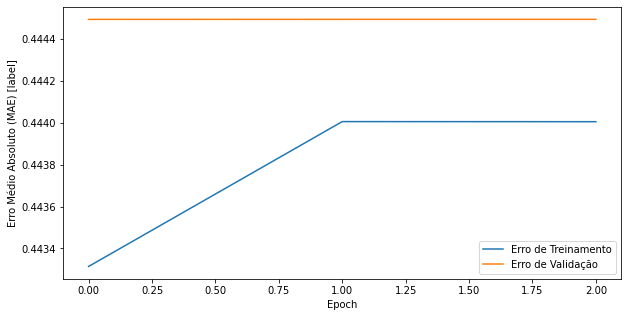

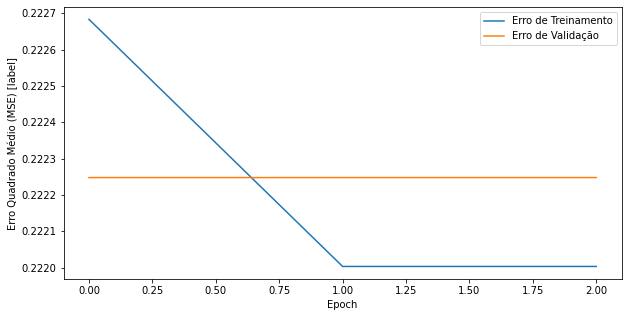

In [ ]:
import matplotlib.pyplot as plt
def plota_historico(history, limita=False):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Erro Médio Absoluto (MAE) [label]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Erro de Treinamento')
  plt.legend(loc='best', fontsize=25)
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Erro de Validação')
  plt.legend(loc='best', fontsize=25)
  if limita == True:
    plt.ylim([0,5])
  plt.legend()

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Erro Quadrado Médio (MSE) [label]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Erro de Treinamento')
  plt.legend(loc='best', fontsize=25)
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Erro de Validação')
  plt.legend(loc='best', fontsize=25)
  if limita == True:
    plt.ylim([0,20])
  plt.legend()
  plt.show()


plota_historico(history)